# DMD on Cylinder Problem

In [1]:
import numpy as np
from pydmd import DMD
from matplotlib import pyplot as plt

In [2]:
from fluidfoam import readscalar, readvector, readforce

In [3]:
datapathbase = "/home/v9z/Documents/2023-SC-AI4S-subsampling-training/data"

In [4]:
x, y, z = readvector(datapathbase, str(100), 'C.gz')

Reading file /home/v9z/Documents/2023-SC-AI4S-subsampling-training/data/100/C.gz


We read all the time steps into a 2D array.

In [5]:
starttime = 800
endtime = 10000
interval = 100
times = range(starttime, endtime+1, interval)
n_time_steps = len(times)
ux = np.zeros((x.shape[0], n_time_steps))
uy = np.zeros((x.shape[0], n_time_steps))
omega = np.zeros((x.shape[0], n_time_steps))
print("Num steps = {}, size of frame = {}".format(n_time_steps, x.shape[0]))

Num steps = 93, size of frame = 10800


In [6]:
for time in times:
    istep = (time - starttime)//interval
    uxi, uyi, uzi = readvector(datapathbase, str(time), 'U.gz')
    ux[:, istep] = uxi[:]
    uy[:, istep] = uyi[:]
    _, _, wzi = readvector(datapathbase, str(time), 'vorticity.gz')
    omega[:, istep] = wzi[:]

Reading file /home/v9z/Documents/2023-SC-AI4S-subsampling-training/data/800/U.gz
Reading file /home/v9z/Documents/2023-SC-AI4S-subsampling-training/data/800/vorticity.gz
Reading file /home/v9z/Documents/2023-SC-AI4S-subsampling-training/data/900/U.gz
Reading file /home/v9z/Documents/2023-SC-AI4S-subsampling-training/data/900/vorticity.gz
Reading file /home/v9z/Documents/2023-SC-AI4S-subsampling-training/data/1000/U.gz
Reading file /home/v9z/Documents/2023-SC-AI4S-subsampling-training/data/1000/vorticity.gz
Reading file /home/v9z/Documents/2023-SC-AI4S-subsampling-training/data/1100/U.gz
Reading file /home/v9z/Documents/2023-SC-AI4S-subsampling-training/data/1100/vorticity.gz
Reading file /home/v9z/Documents/2023-SC-AI4S-subsampling-training/data/1200/U.gz
Reading file /home/v9z/Documents/2023-SC-AI4S-subsampling-training/data/1200/vorticity.gz
Reading file /home/v9z/Documents/2023-SC-AI4S-subsampling-training/data/1300/U.gz
Reading file /home/v9z/Documents/2023-SC-AI4S-subsampling-trai

In [7]:
umag = np.sqrt(ux*ux + uy*uy)

In [8]:
dmdumag = DMD(svd_rank=3)
dmdumag.fit(umag)

In [9]:
dmdw = DMD(svd_rank=3)
dmdw.fit(omega)
dmdw.modes.shape

(10800, 3)

/home/v9z/miniconda3/envs/cfd_analytics/lib/python3.8/site-packages/pydmd/plotter.py:189: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x7f4155479640>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend(


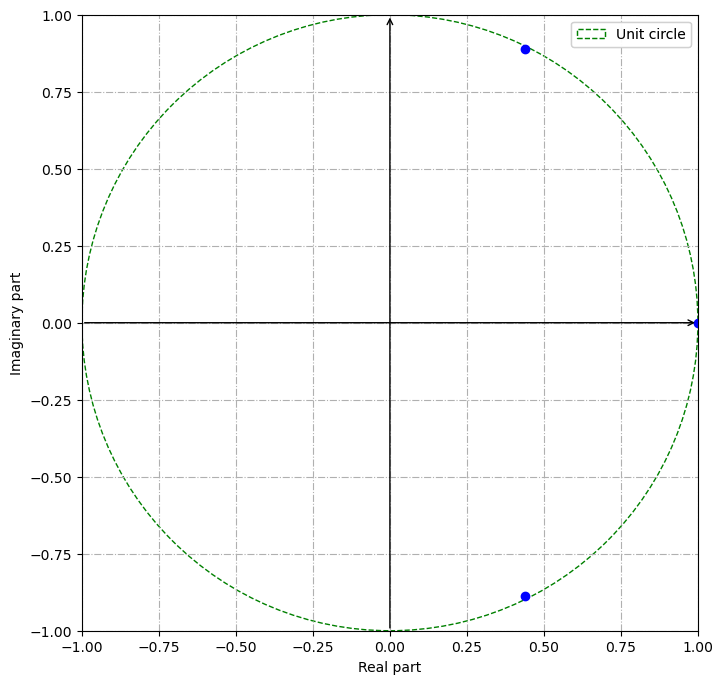

In [13]:
from pydmd.plotter import plot_eigs
plot_eigs(dmdw, show_axes=True, show_unit_circle=True)

/home/v9z/miniconda3/envs/cfd_analytics/lib/python3.8/site-packages/pydmd/plotter.py:189: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x7f41553af460>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend(


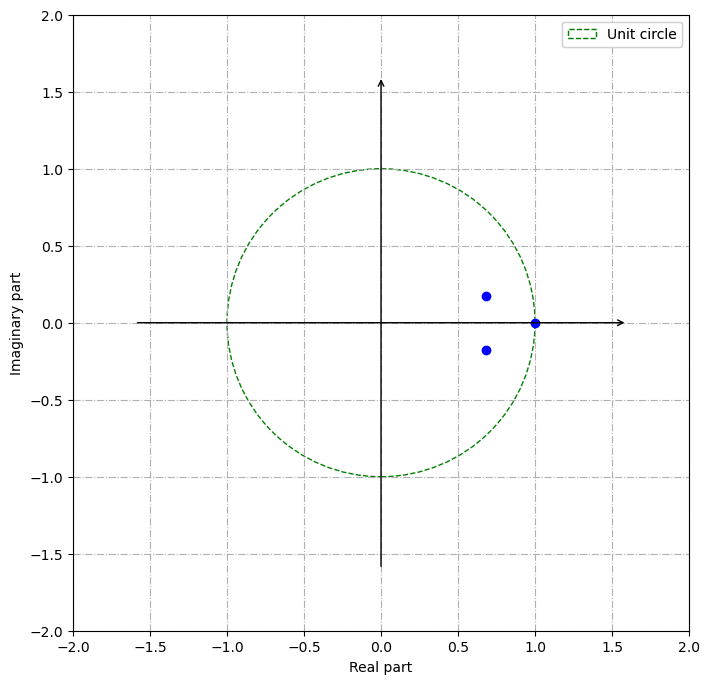

In [14]:
plot_eigs(dmdumag, show_axes=True, show_unit_circle=True)

Seems there are two oscillatory modes one dissipative mode for velocity magnitude, but all three oscillatory modes for vorticity.

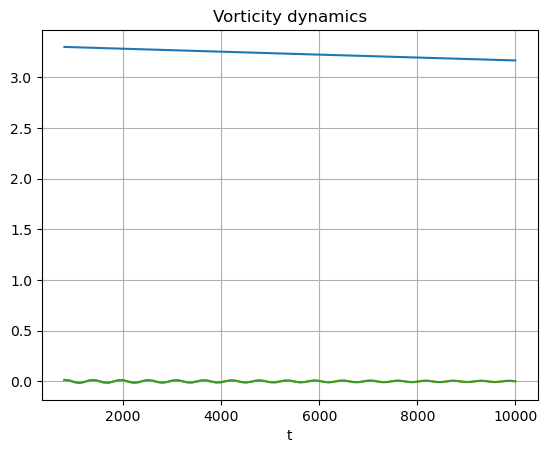

In [15]:
for dynamic in dmdw.dynamics:
    plt.plot(times, dynamic.real)
    plt.title("Vorticity dynamics")
plt.xlabel("t")
plt.grid("on")
plt.show()

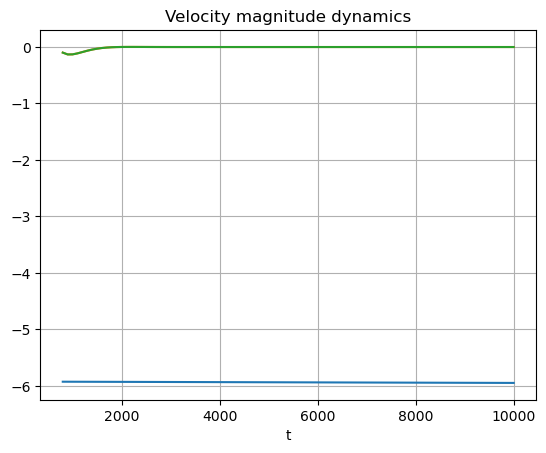

In [16]:
for dynamic in dmdumag.dynamics:
    plt.plot(times, dynamic.real)
    plt.title("Velocity magnitude dynamics")
plt.xlabel("t")
plt.grid("on")
plt.show()